In [1]:
%matplotlib notebook

In [2]:
STEP = 50
AREAS = range(50, 300, STEP)  # 50, 100, 150, 200, 250
PREDICT_TO = 500

In [3]:
import random
import math

import ipywidgets as widgets


def prepare_inputs(areas):
    input_widgets = []
    prev_area = 0
    for area in areas:
        w = widgets.BoundedIntText(
            value=random.randint(1, 10) * area,
            min=0,
            max=2**10000,
            description=f'{prev_area}-{area} m^2:',
        )
        display(w)
        input_widgets.append(w)
        prev_area = area
    
    return input_widgets

        
def prepare_button():
    b = widgets.Button(
        description='Calculate',
        button_style='success',
        tooltip='Click to calculate prices',
    )
    display(b)
    
    return b



BoundedIntText(value=50, description='0-50 m^2:', max=19950631168807583848837421626835850838234968318861924548…

BoundedIntText(value=200, description='50-100 m^2:', max=19950631168807583848837421626835850838234968318861924…

BoundedIntText(value=150, description='100-150 m^2:', max=1995063116880758384883742162683585083823496831886192…

BoundedIntText(value=1200, description='150-200 m^2:', max=199506311688075838488374216268358508382349683188619…

BoundedIntText(value=2500, description='200-250 m^2:', max=199506311688075838488374216268358508382349683188619…

Button(button_style='success', description='Calculate', style=ButtonStyle(), tooltip='Click to calculate price…

<IPython.core.display.Javascript object>


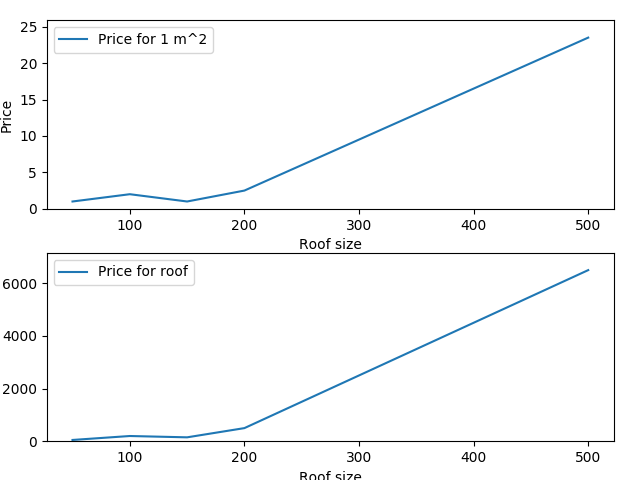

[50, 100, 150, 200, 250, 300, 350, 400, 450, 500] [1.0, 2.0, 1.0, 6.0, 10.0, 14.0, 18.0, 22.0, 26.0, 30.0]
[50, 100, 150, 200, 250, 300, 350, 400, 450, 500] [50, 200, 150, 1200, 2500, 3800, 5100, 6400, 7700, 9000]
[50, 100, 150, 200, 250, 300, 350, 400, 450, 500] [1.0, 2.0, 1.0, 2.5, 4.0, 5.5, 7.0, 8.5, 10.0, 11.5]
[50, 100, 150, 200, 250, 300, 350, 400, 450, 500] [50, 200, 150, 500, 1000, 1500, 2000, 2500, 3000, 3500]
[50, 100, 150, 200, 250, 300, 350, 400, 450, 500] [1.0, 2.0, 1.0, 2.5, 6.0, 9.5, 13.0, 16.5, 20.0, 23.5]
[50, 100, 150, 200, 250, 300, 350, 400, 450, 500] [50, 200, 150, 500, 1500, 2500, 3500, 4500, 5500, 6500]


In [22]:
import matplotlib.pyplot as plt
from scipy import interpolate
from sklearn.svm import SVR


areas = list(AREAS)
predict_areas = list(range(areas[-1] + STEP, PREDICT_TO + STEP, STEP))

inputs = prepare_inputs(AREAS)
submit_b = prepare_button()


def get_m2_values():
    y = [i.value / areas[n] for n, i in enumerate(inputs)]
#     f = interpolate.UnivariateSpline(areas, y, k=1)
    spl = interpolate.splrep(areas, y, k=1, s=0)
    f = lambda inp: interpolate.splev(inp, spl)
    
    for predict_area in predict_areas:
        y.append(float(f(predict_area)))
    
    return areas + predict_areas, y


def get_roof_values():
    y = [i.value for i in inputs]
#     f = interpolate.UnivariateSpline(areas, y, k=1)
    spl = interpolate.splrep(areas, y, k=1, s=0)
    f = lambda inp: interpolate.splev(inp, spl)

    for predict_area in predict_areas:
        y.append(int(f(predict_area)))
    
    return areas + predict_areas, y


def prepare_plots():
    fig, axes = plt.subplots(2, 1, squeeze=False)

    ax1 = axes[0][0]
    ax2 = axes[1][0]

    fig.tight_layout()
    
    x, y = get_m2_values()
    ax1.plot(x, y, label='Price for 1 m^2')
    
    x, y = get_roof_values()
    ax2.plot(x, y, label='Price for roof')

    for ax in (ax1, ax2):
        ax.set_xlabel('Roof size')
        ax.set_ylabel('Price')

        ax.legend()
        
    return ax1, ax2


plots = prepare_plots()


def redraw_plots(button):
    data_getters = [get_m2_values, get_roof_values]
    for plot, get_data in zip(plots, data_getters):
        x, y = get_data()
#         print(x, y)
        
        plot.lines[0].set_ydata(y)
        plot.set_ylim(0, max(y) * 1.1)

redraw_plots(None)

submit_b.on_click(redraw_plots)